# Emotion Recognition - Model Evaluation


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import pandas as pd


In [ ]:
# Configuration
model_path = 'model.h5'  
test_dir = 'images/test/'
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']


In [3]:
# Load model
model = load_model(model_path)
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_11 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_11 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                    

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)


Found 7066 images belonging to 7 classes.


In [5]:
# Predictions
predictions = model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


221/221 [==============================] - 12s 55ms/step


In [6]:
# Metrics
accuracy = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

report = classification_report(y_true, y_pred, target_names=emotion_labels, output_dict=True)
print('\nClassification Report:')
print(pd.DataFrame(report).transpose().round(4))

cm = confusion_matrix(y_true, y_pred)


Accuracy: 0.5686
F1-Score (Macro): 0.4467
F1-Score (Weighted): 0.5438

Classification Report:
              precision  recall  f1-score    support
Angry            0.4498  0.4531    0.4515   960.0000
Disgust          0.0000  0.0000    0.0000   111.0000
Fear             0.3994  0.1306    0.1969  1018.0000
Happy            0.8510  0.8230    0.8368  1825.0000
Neutral          0.4803  0.6711    0.5599  1216.0000
Sad              0.4134  0.3942    0.4036  1139.0000
Surprise         0.5617  0.8570    0.6786   797.0000
accuracy         0.5686  0.5686    0.5686     0.5686
macro avg        0.4508  0.4756    0.4467  7066.0000
weighted avg     0.5511  0.5686    0.5438  7066.0000


c:\Users\Shubhanshu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shubhanshu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shubhanshu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

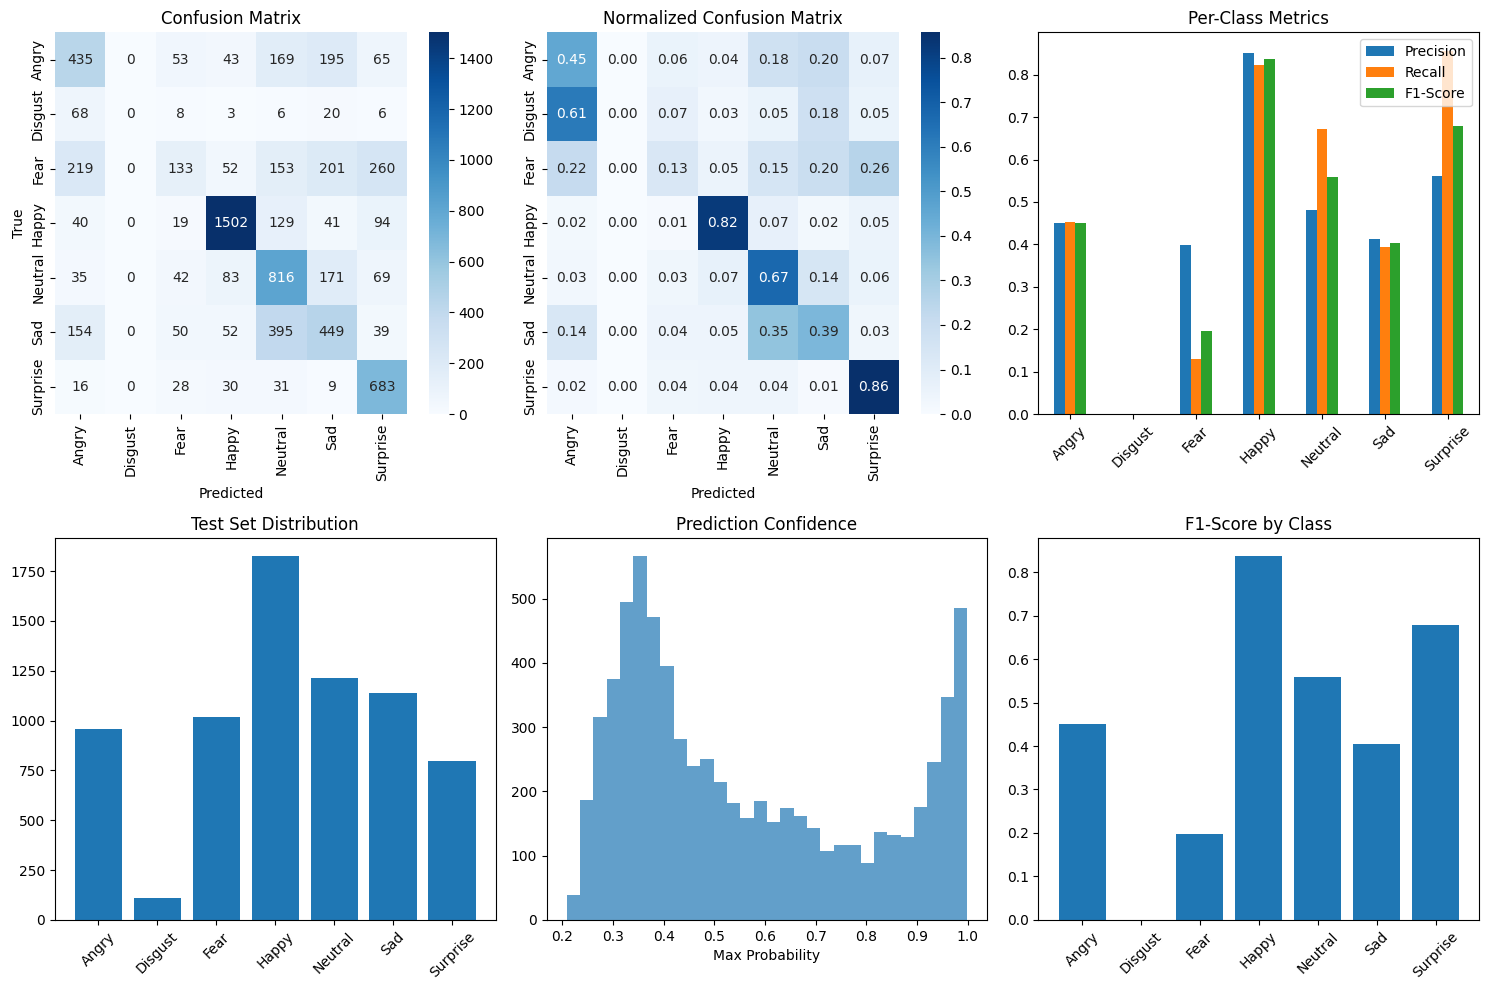

In [7]:
# Plots
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Normalized Confusion Matrix
plt.subplot(2, 3, 2)
row_sums = cm.sum(axis=1)[:, np.newaxis]
cm_norm = np.divide(cm.astype('float'), row_sums, where=row_sums!=0)
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')

# Per-class metrics
plt.subplot(2, 3, 3)
metrics_df = pd.DataFrame({
    'Precision': [report[emotion]['precision'] for emotion in emotion_labels],
    'Recall': [report[emotion]['recall'] for emotion in emotion_labels],
    'F1-Score': [report[emotion]['f1-score'] for emotion in emotion_labels]
}, index=emotion_labels)
metrics_df.plot(kind='bar', ax=plt.gca())
plt.title('Per-Class Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Class distribution
plt.subplot(2, 3, 4)
unique, counts = np.unique(y_true, return_counts=True)
plt.bar([emotion_labels[i] for i in unique], counts)
plt.title('Test Set Distribution')
plt.xticks(rotation=45)

# Prediction confidence
plt.subplot(2, 3, 5)
max_probs = np.max(predictions, axis=1)
plt.hist(max_probs, bins=30, alpha=0.7)
plt.title('Prediction Confidence')
plt.xlabel('Max Probability')

# F1 scores by class
plt.subplot(2, 3, 6)
f1_per_class = f1_score(y_true, y_pred, average=None)
plt.bar(emotion_labels, f1_per_class)
plt.title('F1-Score by Class')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [8]:
# Summary & Interpretation
best_class = emotion_labels[np.argmax(f1_per_class)]
worst_class = emotion_labels[np.argmin(f1_per_class)]
print(f"\nBest performing: {best_class} (F1: {max(f1_per_class):.4f})")
print(f"Worst performing: {worst_class} (F1: {min(f1_per_class):.4f})")
print(f"Average confidence: {np.mean(max_probs):.4f}")



Best performing: Happy (F1: 0.8368)
Worst performing: Disgust (F1: 0.0000)
Average confidence: 0.5656
